<a href="https://colab.research.google.com/github/Erika2397/Clusterizacion-como-manejar-datos-no-etiquetados-/blob/main/notebooks/aula_3/notebook_aula_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
url = 'https://raw.githubusercontent.com/Erika2397/Clusterizacion-como-manejar-datos-no-etiquetados-/refs/heads/main/datos_mkt_traducido.csv'

# Recopilando y ajustando datos

In [3]:
df = pd.read_csv(url)
df

,sexo,edad,numero_de_amigos,basquet,futbol_americano,futbol,softbol,voleibol,natacion,animacion,...,musica,rock,cabello,vestido,centro_comercial,compras,ropa,nuestra_marca,marca_de_la_competencia,bebidas
0,F,27,49,0,0,10,0,0,10,0,...,0,0,0,0,0,0,0,0,0,10
1,F,27,41,0,0,0,0,0,0,0,...,10,20,40,0,10,0,0,0,0,10
2,F,26,1,0,0,0,0,0,10,0,...,10,0,50,0,0,0,30,0,0,0
3,M,28,32,0,50,0,0,0,0,0,...,10,10,0,0,0,0,0,0,0,0
4,M,28,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12987,F,26,21,0,0,0,0,0,0,0,...,0,10,10,0,0,0,20,0,0,0
12988,F,26,50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12989,F,27,32,0,0,0,0,0,0,10,...,0,0,0,0,0,0,0,0,0,0
12990,F,27,20,0,0,0,0,0,0,0,...,10,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12992 entries, 0 to 12991
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   sexo                     12992 non-null  object
 1   edad                     12992 non-null  int64 
 2   numero_de_amigos         12992 non-null  int64 
 3   basquet                  12992 non-null  int64 
 4   futbol_americano         12992 non-null  int64 
 5   futbol                   12992 non-null  int64 
 6   softbol                  12992 non-null  int64 
 7   voleibol                 12992 non-null  int64 
 8   natacion                 12992 non-null  int64 
 9   animacion                12992 non-null  int64 
 10  beisbol                  12992 non-null  int64 
 11  tenis                    12992 non-null  int64 
 12  deportes                 12992 non-null  int64 
 13  tierno                   12992 non-null  int64 
 14  danza                    12992 non-nul

In [5]:
df.sexo.unique()

array(['F', 'M', 'NE'], dtype=object)

## Aplicando codificador

In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories=[['F', 'M', 'NE']], sparse_output = False)

In [7]:
sexo_codificado = encoder.fit_transform(df[['sexo']])
sexo_codificado

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [8]:
encoded_df = pd.DataFrame(sexo_codificado, columns=encoder.get_feature_names_out(['sexo']))

In [9]:
datos = pd.concat([df, encoded_df], axis=1).drop('sexo', axis=1)
datos

,edad,numero_de_amigos,basquet,futbol_americano,futbol,softbol,voleibol,natacion,animacion,beisbol,...,vestido,centro_comercial,compras,ropa,nuestra_marca,marca_de_la_competencia,bebidas,sexo_F,sexo_M,sexo_NE
0,27,49,0,0,10,0,0,10,0,0,...,0,0,0,0,0,0,10,1.0,0.0,0.0
1,27,41,0,0,0,0,0,0,0,10,...,0,10,0,0,0,0,10,1.0,0.0,0.0
2,26,1,0,0,0,0,0,10,0,0,...,0,0,0,30,0,0,0,1.0,0.0,0.0
3,28,32,0,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
4,28,18,0,0,0,0,0,0,0,0,...,0,0,0,10,0,0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12987,26,21,0,0,0,0,0,0,0,0,...,0,0,0,20,0,0,0,1.0,0.0,0.0
12988,26,50,0,0,0,0,0,0,0,10,...,0,0,0,0,0,0,0,1.0,0.0,0.0
12989,27,32,0,0,0,0,0,0,10,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0
12990,27,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0


In [10]:
import joblib

joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

## Desarrollando el modelo

In [11]:
from sklearn.cluster import KMeans

mod_kmeans = KMeans(n_clusters=2, random_state=45)

In [12]:
modelo = mod_kmeans.fit(datos)

# Evaluando el K-means

In [13]:
mod_kmeans.inertia_

24912957.594588462

In [14]:
from sklearn.metrics import silhouette_score

silhouette_score(datos, mod_kmeans.predict(datos))

np.float64(0.3799715886302017)

## Evaluando métricas para diferentes K

In [15]:
def evaluacion(datos):
  inercia = []
  silueta = []

  for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=45, n_init = 'auto')
    kmeans.fit(datos)
    inercia.append(kmeans.inertia_)
    silueta.append(f'k={k} - ' + str(silhouette_score(datos, kmeans.predict(datos))))
  return silueta, inercia

In [16]:
silueta, inercia = evaluacion(datos)
silueta

['k=2 - 0.3799715886302017',
 'k=3 - 0.2631947012216279',
 'k=4 - 0.27497370057197046',
 'k=5 - 0.2762790287828939',
 'k=6 - 0.2814107923103627',
 'k=7 - 0.19566339131554092',
 'k=8 - 0.12271514125212872',
 'k=9 - 0.1281093701405103',
 'k=10 - 0.13020718009107704',
 'k=11 - 0.13209306347804026',
 'k=12 - 0.09015815350273831',
 'k=13 - 0.09002551845716941',
 'k=14 - 0.08959066111262458',
 'k=15 - 0.09427696863257996',
 'k=16 - 0.09552364235312874',
 'k=17 - 0.09543714624178481',
 'k=18 - 0.08844412672288283',
 'k=19 - 0.0844173588143633',
 'k=20 - 0.08484109789709748']

## Clase 2.3 - Verificando la silueta por muestras

In [17]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

def graf_silueta (n_clusters, datos):

  # Aplica el KMeans al conjunto de datos
  kmeans = KMeans(n_clusters=n_clusters, random_state=45, n_init = 'auto')
  cluster_prevision = kmeans.fit_predict(datos)

  # Calcula la silueta promedio
  silueta_promedio = silhouette_score(datos, cluster_prevision)
  print(f'Valor promedio para {n_clusters} clusters: {silueta_promedio:.3f}')

  # Calcula a puntuacion de silueta para cada muestra
  silueta_muestra = silhouette_samples(datos, cluster_prevision)

  # Configuracion de figura para el grafico de silueta
  fig, ax1 = plt.subplots(1, 1)
  fig.set_size_inches(9, 7)

  # Limites del grafico de silueta
  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(datos) + (n_clusters + 1) * 10])

  y_lower = 10
  for i in range(n_clusters):
      ith_cluster_silueta_muestra = silueta_muestra[cluster_prevision == i]
      ith_cluster_silueta_muestra.sort()

      tamano_cluster_i = ith_cluster_silueta_muestra.shape[0]
      y_upper = y_lower + tamano_cluster_i

      cor = cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silueta_muestra,
                        facecolor=cor, edgecolor=cor, alpha=0.7)

      ax1.text(-0.05, y_lower + 0.5 * tamano_cluster_i, str(i))
      y_lower = y_upper + 10  # 10 para o espaço entre gráficos

  # Linea vertical para el promedio de Silhouette Score
  ax1.axvline(x=silueta_promedio, color='red', linestyle='--')

  ax1.set_title(f'Gráfico de silueta para {n_clusters} clusters')
  ax1.set_xlabel('Valores del coeficiente de silueta')
  ax1.set_ylabel('Etiqueta del cluster')

  ax1.set_yticks([])  # Remueve ticks
  ax1.set_xticks([i/10.0 for i in range(-1, 11)])

  plt.show()

Valor promedio para 2 clusters: 0.380


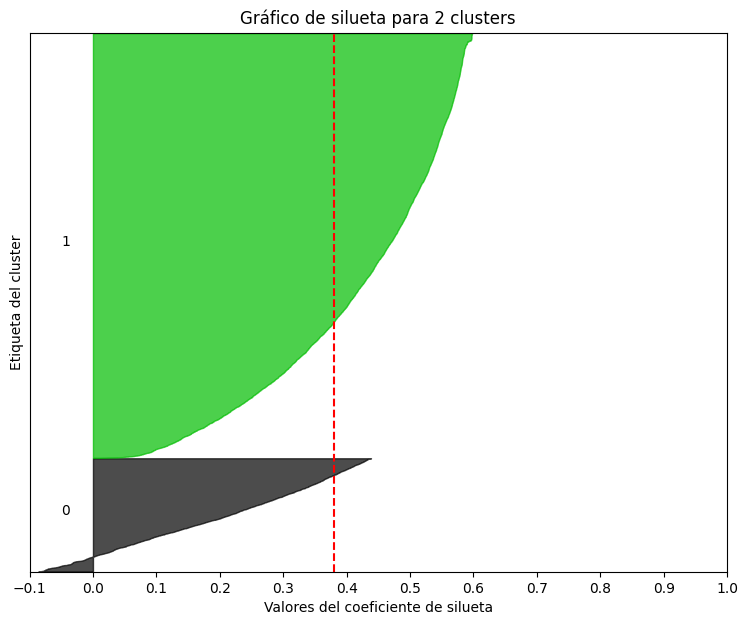

In [18]:
graf_silueta(2, datos)

### Otras visualizaciones

In [19]:
def plot_codo(inercia):
  plt.figure(figsize=(8,4))
  plt.plot(range (2,21), inercia, 'bo-')
  plt.xlabel("Número de clusters")
  plt.ylabel("Inercia")
  plt.title("Método del Codo para Dterminación de K")
  plt.show()

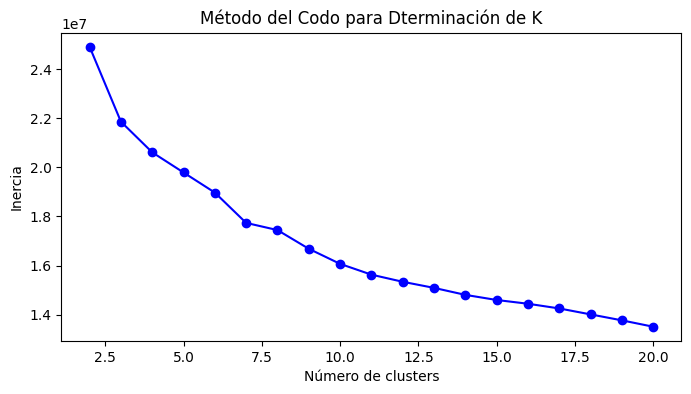

In [20]:
plot_codo(inercia)

# Evaluación y ajuste de datos

## Verificando las métricas para los nuevos datos

## Creando el mejor modelo

# Analizando las informaciones de cada cluster

## Describiendo cada agrupamiento

# Proyecto Final: Descubre tu Tribu Digital

En este proyecto vas a aplicar lo aprendido en clustering para segmentar usuarios según su estilo de vida y sus intereses.

La base de datos que usamos contiene información sobre deportes, música, ropa y más. A partir de estos datos, vas a descubrir **grupos con perfiles similares** que podrían representar "tribus digitales".


## Objetivo

🎯 **Objetivo:** Ayudar a un equipo de marketing a entender mejor los diferentes perfiles de usuarios para personalizar campañas y productos.

## Seleccionando variables

 ## Visualización

## 🚀 Bonus: Visualiza todo como una app interactiva

Todo este análisis puede convertirse en una **aplicación web** usando Streamlit.
🔗 [Haz clic aquí para probar la app en vivo](https://tu-app.streamlit.app)

La app permite:
- Cambiar la cantidad de clusters
- Elegir qué columnas usar
- Visualizar los grupos en 2D
- Ver el perfil promedio de cada tribu digital